In [87]:
import tensorflow as tf
import xlrd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
data = xlrd.open_workbook('data/fire_theft.xls')


*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [75]:
sheet = data.sheet_by_index(0)

In [76]:
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

In [77]:
n_samples = sheet.nrows - 1 

In [78]:
X = tf.placeholder(dtype=tf.float32,name='X')
Y = tf.placeholder(dtype=tf.float32,name='y')

In [79]:
w = tf.Variable(0.0, name='weights',dtype=tf.float32)
b = tf.Variable(0.0, name='bias',dtype=tf.float32)

In [80]:
y_predicted = X*w + b

In [81]:
loss = tf.square(y_predicted - y)

In [82]:
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [83]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    
    for i in range(500):
        total_loss=0
        for x,y in data:
            _,l = sess.run([optimize,loss],feed_dict={X:x,Y:y})
            total_loss+=l
        
        print("iteration:{} loss:{} ".format(i,total_loss))
    w, b = sess.run([w, b]) 

    
    

iteration:0 loss:8940.417485871352 
iteration:1 loss:10209.569467804395 
iteration:2 loss:9674.196445380338 
iteration:3 loss:9166.89653567411 
iteration:4 loss:8686.193675940856 
iteration:5 loss:8230.702799132094 
iteration:6 loss:7799.098617656622 
iteration:7 loss:7390.122302057687 
iteration:8 loss:7002.59626738634 
iteration:9 loss:6635.389248430263 
iteration:10 loss:6287.436095390469 
iteration:11 loss:5957.732596684014 
iteration:12 loss:5645.3160440465435 
iteration:13 loss:5349.2848936163355 
iteration:14 loss:5068.77538066078 
iteration:15 loss:4802.975731068524 
iteration:16 loss:4551.114624809474 
iteration:17 loss:4312.460411467822 
iteration:18 loss:4086.3203499803785 
iteration:19 loss:3872.037873654859 
iteration:20 loss:3668.9936809772626 
iteration:21 loss:3476.597346818773 
iteration:22 loss:3294.290605078917 
iteration:23 loss:3121.5432054772973 
iteration:24 loss:2957.8537081636023 
iteration:25 loss:2802.7476469328394 
iteration:26 loss:2655.7753857084317 
itera

iteration:222 loss:0.06911603545086109 
iteration:223 loss:0.0654948536066513 
iteration:224 loss:0.062053244346316205 
iteration:225 loss:0.05879886966795311 
iteration:226 loss:0.05572248551106895 
iteration:227 loss:0.052813695881923195 
iteration:228 loss:0.05005560467179748 
iteration:229 loss:0.0474163430299086 
iteration:230 loss:0.044917466715560295 
iteration:231 loss:0.04256053174685803 
iteration:232 loss:0.0403149530684459 
iteration:233 loss:0.038190269136975985 
iteration:234 loss:0.036195833283272805 
iteration:235 loss:0.03429989138385281 
iteration:236 loss:0.03250761748495279 
iteration:237 loss:0.03080195520669804 
iteration:238 loss:0.02918717656939407 
iteration:239 loss:0.027653419954731362 
iteration:240 loss:0.026199159874522593 
iteration:241 loss:0.024819345690048067 
iteration:242 loss:0.0235147744169808 
iteration:243 loss:0.02227783077978529 
iteration:244 loss:0.021109634959429968 
iteration:245 loss:0.020004758462164318 
iteration:246 loss:0.0189566345434

iteration:427 loss:7.987098797457293e-06 
iteration:428 loss:7.978480425663292e-06 
iteration:429 loss:7.97224129200913e-06 
iteration:430 loss:7.98005930846557e-06 
iteration:431 loss:7.983671821421012e-06 
iteration:432 loss:7.983671821421012e-06 
iteration:433 loss:7.983671821421012e-06 
iteration:434 loss:7.98005930846557e-06 
iteration:435 loss:7.983671821421012e-06 
iteration:436 loss:7.983671821421012e-06 
iteration:437 loss:7.983671821421012e-06 
iteration:438 loss:7.98005930846557e-06 
iteration:439 loss:7.983671821421012e-06 
iteration:440 loss:7.983671821421012e-06 
iteration:441 loss:7.987098797457293e-06 
iteration:442 loss:7.978480425663292e-06 
iteration:443 loss:7.97224129200913e-06 
iteration:444 loss:7.98005930846557e-06 
iteration:445 loss:7.983671821421012e-06 
iteration:446 loss:7.983671821421012e-06 
iteration:447 loss:7.983671821421012e-06 
iteration:448 loss:7.98005930846557e-06 
iteration:449 loss:7.983671821421012e-06 
iteration:450 loss:7.983671821421012e-06 

In [84]:
b

18.999489

In [85]:
y_predicted

<tf.Tensor 'add_5:0' shape=<unknown> dtype=float32>

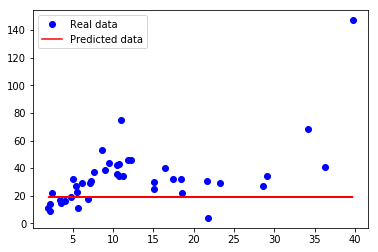

In [88]:

X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()